In [2]:
#coding:utf-8
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [5]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()    #インスタンス生成
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print("test loss:", score[0])
print("test accuracy:", score[1])
print("Calculation time:{0:.3f}".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 85s 1ms/step - loss: 0.6160 - acc: 0.8111 - val_loss: 0.1171 - val_acc: 0.9644
Epoch 2/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1302 - acc: 0.9609 - val_loss: 0.0618 - val_acc: 0.9798
Epoch 3/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0864 - acc: 0.9738 - val_loss: 0.0469 - val_acc: 0.9860
Epoch 4/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0678 - acc: 0.9790 - val_loss: 0.0382 - val_acc: 0.9879
Epoch 5/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0563 - acc: 0.9827 - val_loss: 0.0325 - val_acc: 0.9883
Epoch 6/20
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0501 - acc: 0.9845 - val_loss: 0.0293 - val_acc: 0.9906
Epoch 7/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0461 - acc: 0.9857 - val_loss: 0.0293 - val_acc

In [7]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color="cornflowerblue", linewidth=5)
        
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

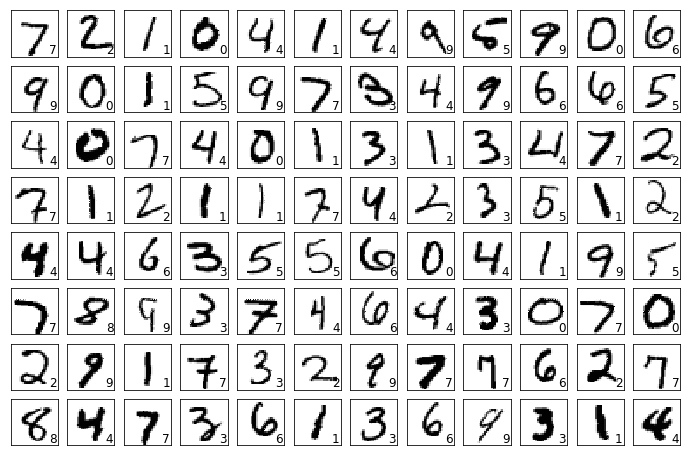

In [8]:
show_prediction()